In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=  pd.read_csv('/kaggle/input/conversion-predictors-of-cis-to-multiple-sclerosis/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

In [3]:
df=df.drop('Unnamed: 0' , axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    int64  
 1   Age                      273 non-null    int64  
 2   Schooling                272 non-null    float64
 3   Breastfeeding            273 non-null    int64  
 4   Varicella                273 non-null    int64  
 5   Initial_Symptom          272 non-null    float64
 6   Mono_or_Polysymptomatic  273 non-null    int64  
 7   Oligoclonal_Bands        273 non-null    int64  
 8   LLSSEP                   273 non-null    int64  
 9   ULSSEP                   273 non-null    int64  
 10  VEP                      273 non-null    int64  
 11  BAEP                     273 non-null    int64  
 12  Periventricular_MRI      273 non-null    int64  
 13  Cortical_MRI             273 non-null    int64  
 14  Infratentorial_MRI       2

In [5]:
df.shape

(273, 19)

In [6]:
df.isnull().sum()

Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [7]:
df = df.drop(['Initial_EDSS', 'Final_EDSS'], axis=1)

In [8]:
df.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1


In [9]:
df = df.fillna(df.mean(), axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    int64  
 1   Age                      273 non-null    int64  
 2   Schooling                273 non-null    float64
 3   Breastfeeding            273 non-null    int64  
 4   Varicella                273 non-null    int64  
 5   Initial_Symptom          273 non-null    float64
 6   Mono_or_Polysymptomatic  273 non-null    int64  
 7   Oligoclonal_Bands        273 non-null    int64  
 8   LLSSEP                   273 non-null    int64  
 9   ULSSEP                   273 non-null    int64  
 10  VEP                      273 non-null    int64  
 11  BAEP                     273 non-null    int64  
 12  Periventricular_MRI      273 non-null    int64  
 13  Cortical_MRI             273 non-null    int64  
 14  Infratentorial_MRI       2

<Axes: >

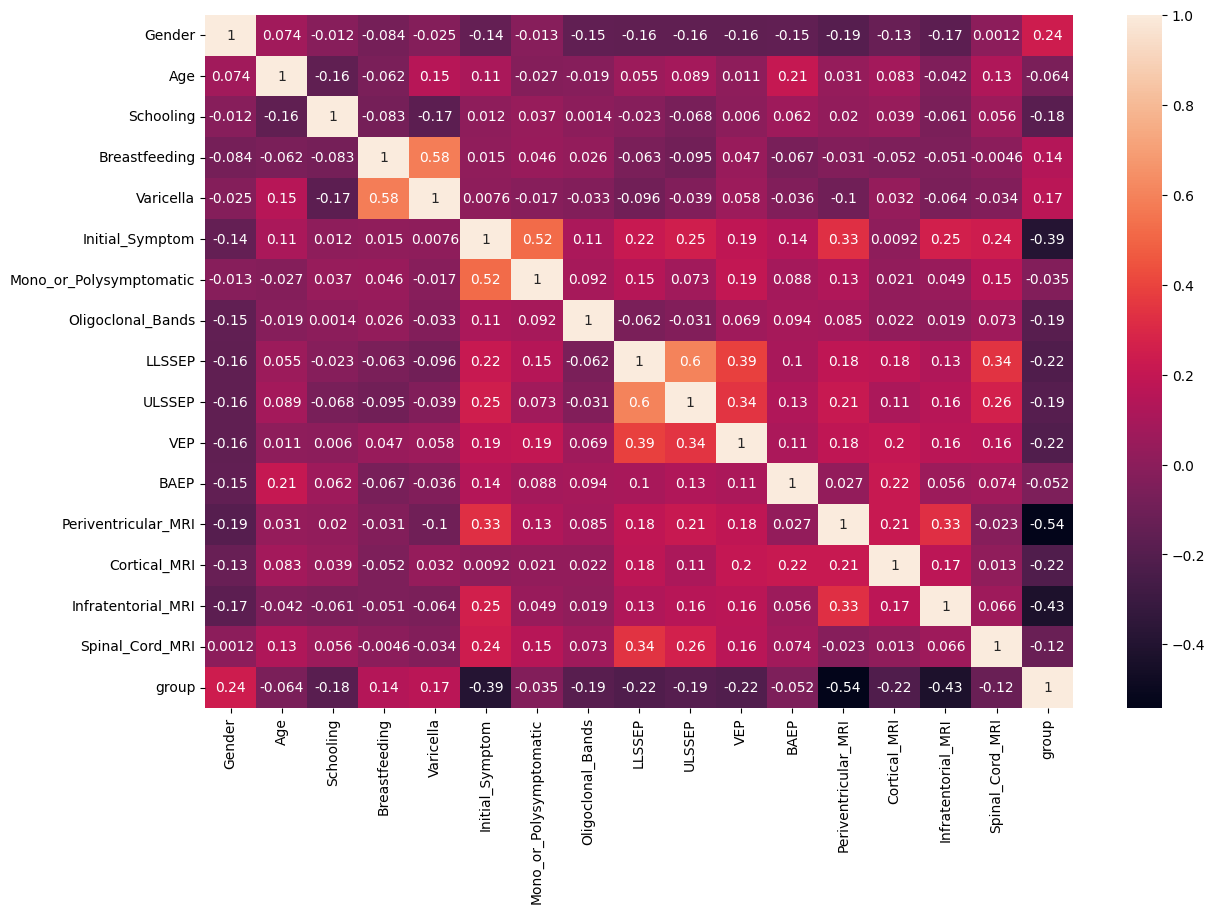

In [10]:
corr = df.corr()
plt.figure(figsize=(14, 9))
sns.heatmap(corr, annot=True)

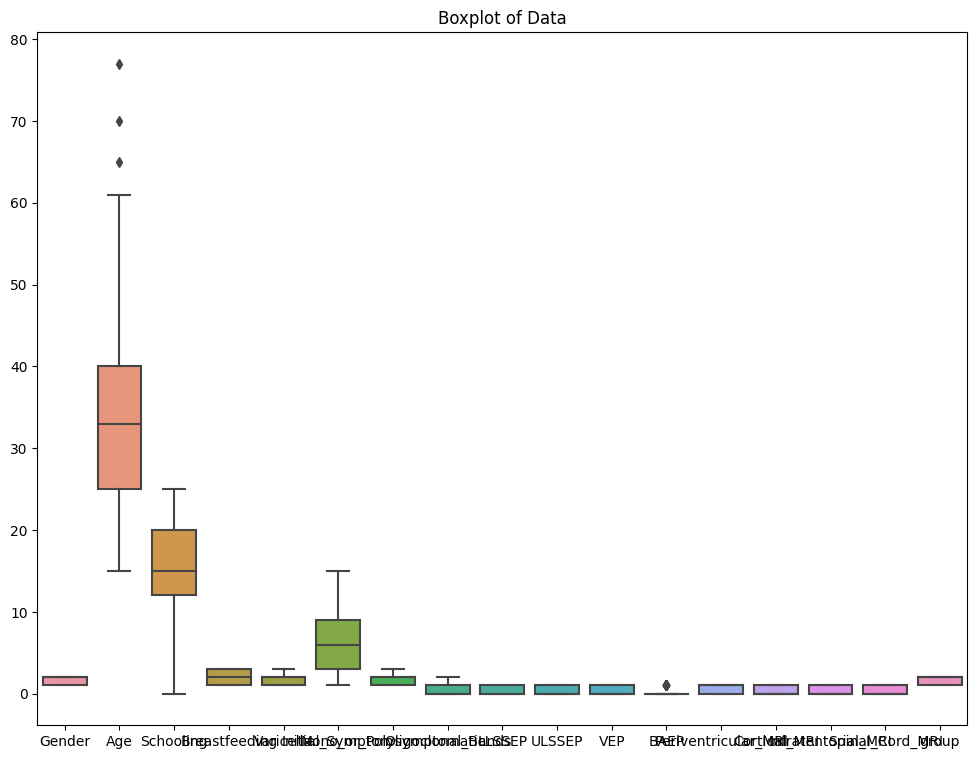

In [11]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=df)

plt.title("Boxplot of Data")

plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df.isna().sum().sum()

0

In [14]:
X = df.drop('group', axis=1)
y = df['group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [15]:
X_train.shape

(218, 16)

In [16]:
X_test.shape

(55, 16)

In [17]:
len(X_train.columns)

16

Epoch 1/50
1/1 [==============================] - 16s 16s/step - loss: 1.0090 - accuracy: 0.7500 - val_loss: 1.0024 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 71ms/step - loss: 0.8757 - accuracy: 0.7500 - val_loss: 0.9867 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 59ms/step - loss: 0.7737 - accuracy: 0.7500 - val_loss: 1.0014 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 75ms/step - loss: 0.7057 - accuracy: 0.7500 - val_loss: 1.0340 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 60ms/step - loss: 0.6687 - accuracy: 0.7500 - val_loss: 1.0593 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 57ms/step - loss: 0.6498 - accuracy: 0.7500 - val_loss: 1.0563 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 70ms/step - loss: 0.6347 - accuracy: 0.7500 - val_loss: 1.0206 - val_accuracy: 0.5000
Epoch 8/50
1/1 [===========

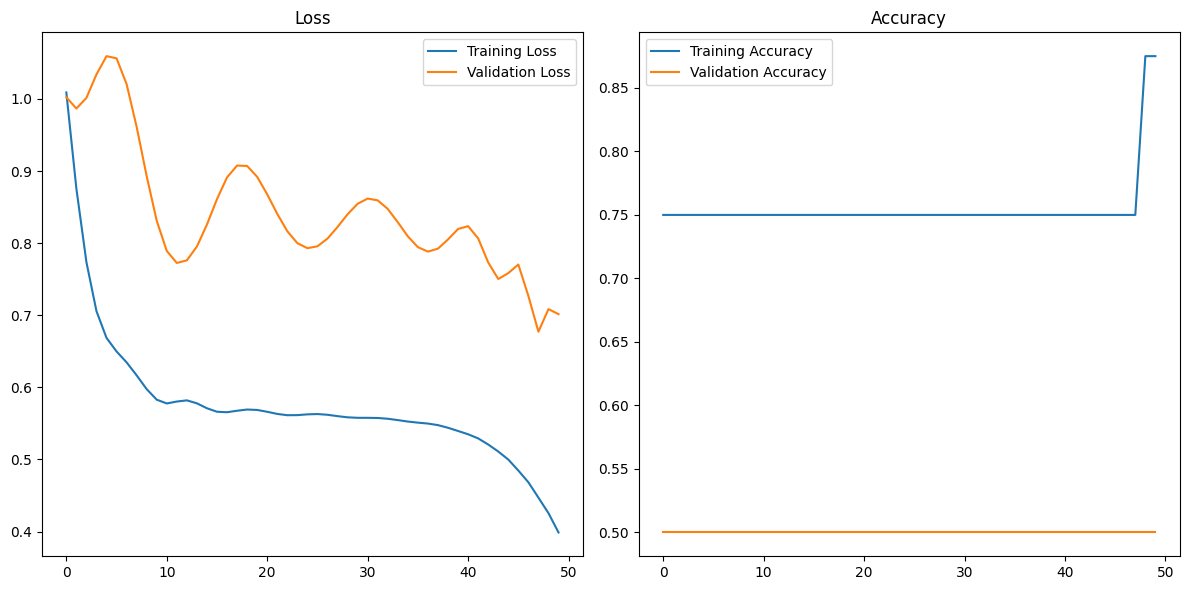

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('group', axis=1), df.group, test_size=0.2, random_state=42)

# Choose a smaller subset of data for modeling
subset_size = 20  # Adjust this to your desired subset size
subset_df = df.sample(n=subset_size, random_state=42)

# Choose the target variable for classification
target_variable = 'group'  # Change this to the desired target variable

# Create sequences for time series data
sequence_length = 10  # Define the number of time steps in each sequence
X_sequences = []
y_labels = []

for i in range(len(subset_df) - sequence_length):
    X_sequences.append(subset_df.drop(columns=target_variable).iloc[i:i + sequence_length])
    y_labels.append(subset_df[target_variable].iloc[i + sequence_length])

X_sequences = np.array(X_sequences)
y_labels = np.array(y_labels)

# Convert target variable to categorical
num_classes = np.max(y_labels) + 1
y_labels_categorical = np.eye(num_classes)[y_labels]

# Split into training and validation sets
X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(X_sequences, y_labels_categorical, test_size=0.2, random_state=42)

# Build a more complex LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, X_sequences.shape[2]), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(num_classes, activation='softmax'))  # Change the final layer activation to softmax

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the more complex LSTM model
history = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=64, validation_data=(X_val_seq, y_val_seq))

# Predict classes using the more complex LSTM model
X_test_sequences = []
for i in range(len(subset_df) - sequence_length):
    X_test_sequences.append(subset_df.drop(columns=target_variable).iloc[i:i + sequence_length])

X_test_sequences = np.array(X_test_sequences)
y_pred = model.predict(X_test_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_labels, y_pred_classes)

print(f"Accuracy: {accuracy:.2f}")

# Classification report

classification_rep = classification_report(y_labels, y_pred_classes, labels=np.unique(y_labels), zero_division=0)
print("Classification Report:")
print(classification_rep)

# Plot loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

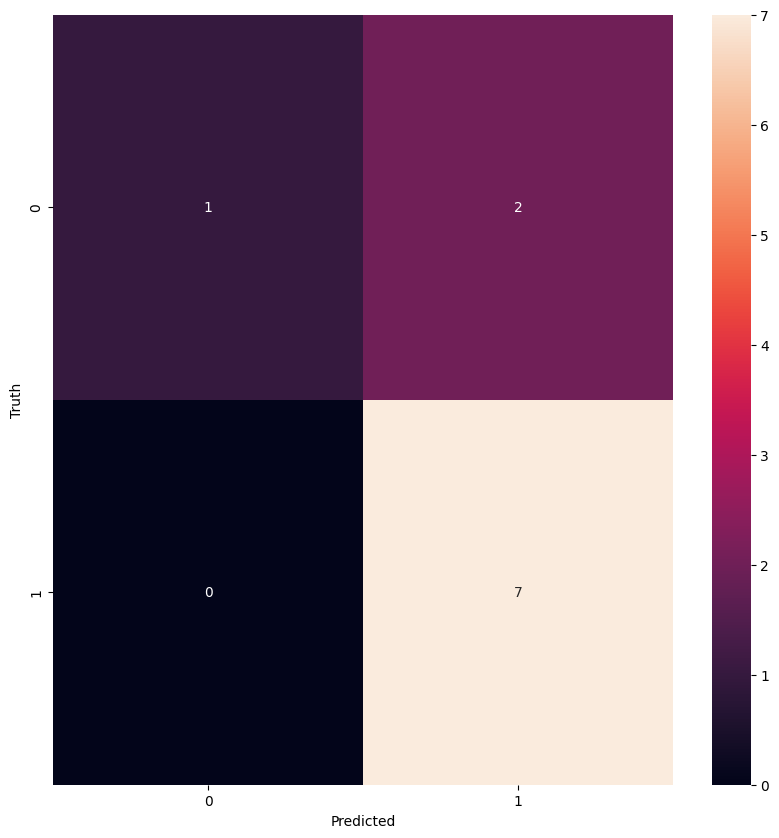

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test are your true labels and predictions are your model's predictions
cm = confusion_matrix(y_labels, y_pred_classes)

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)#fmt='.3g',xticklabels=y_labels,yticklabels=y_labels,cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [28]:
from tensorflow.keras.models import load_model
model.save("lstm model.h5") 